In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
# import the dataset
def importdata():
    heart_data = pd.read_csv('heart.csv')
    
    # print dataset information

    # the length of the dataset
    print("Dataset Length:", len(heart_data)) 
    # (rows, columns) 
    print("Dataset Shape:", heart_data.shape)
    # print the first few rows of the dataset  
    print("Dataset:", heart_data.head())       
    
    return heart_data

In [ ]:
# split the dataset 
def splitdataset(heart_data):
    X = heart_data.drop('target', axis=1) 
    Y = heart_data['target']               

    # Splitting the dataset into test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    
    return X_train, X_test, y_train, y_test

In [ ]:
#  train the decision tree using information gain
def train_using_info_gain(X_train, X_test, y_train):
    # minimize the entropy 
    clf_info_gain = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=5, min_samples_leaf=10)
    # Training the decision tree
    clf_info_gain.fit(X_train, y_train) 

    return clf_info_gain

In [ ]:
#  make predictions
def prediction(X_test, clf_object):
    # predicting the target variable 
    y_pred = clf_object.predict(X_test)  
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [ ]:
# calculate accuracy 
def cal_accuracy(y_test, y_pred):

    # print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))  
    # Calculating and printing accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred) * 100) 
    # Displaying classification report
    print("Report:")
    print(classification_report(y_test, y_pred)) 

In [ ]:
# plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

Dataset Length: 303
Dataset Shape: (303, 14)
Dataset:    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Predicted values:
[1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1
 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1]
Confusion Matrix:
[[36 10]
 [ 7 38]]
Accuracy: 81.31868131868131
Report:
              precision    recall  f1-score   supp

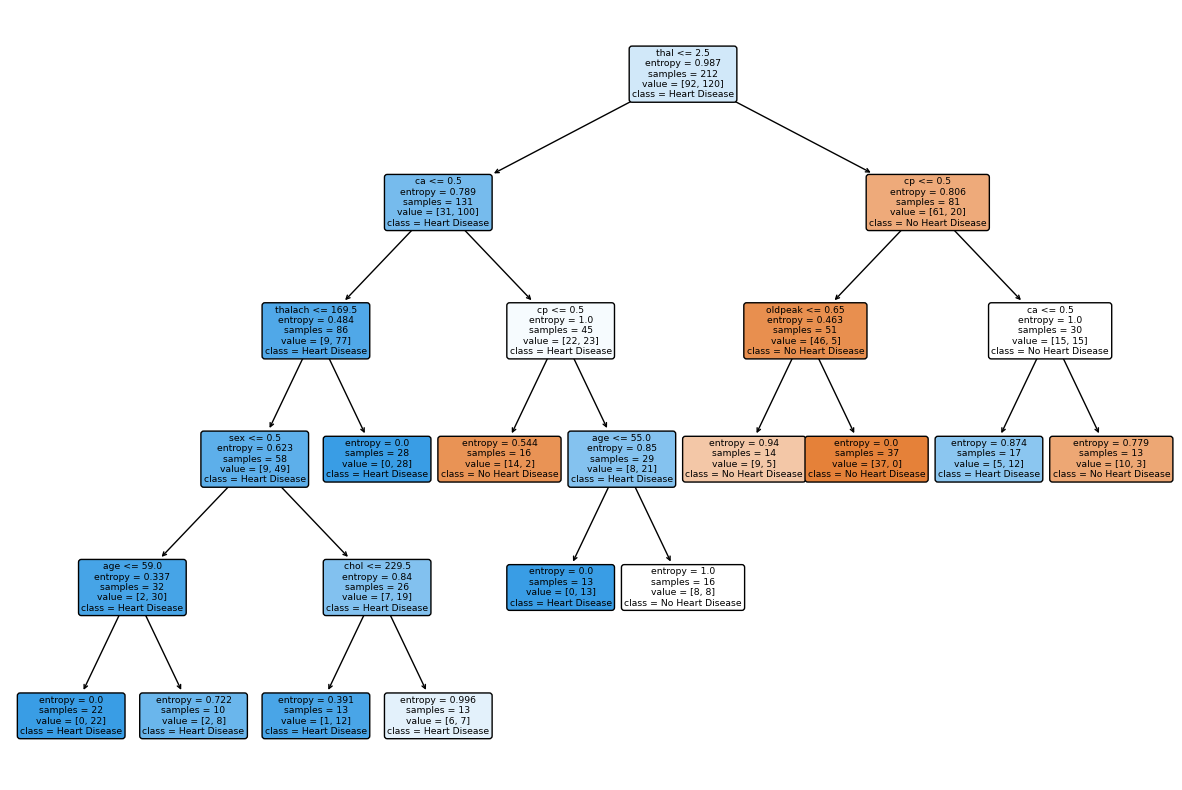

In [7]:
# main
if __name__ == "__main__":
    data = importdata()  
    X_train, X_test, y_train, y_test = splitdataset(data)
    # Train the decision tree 
    clf_info_gain = train_using_info_gain(X_train, X_test, y_train)
    # predictions 
    y_pred = prediction(X_test, clf_info_gain)
    # accuracy and other metrics
    cal_accuracy(y_test, y_pred)

    # Visualize the decision tree.
    plot_decision_tree(clf_info_gain, X_train.columns, ['No Heart Disease', 'Heart Disease'])
